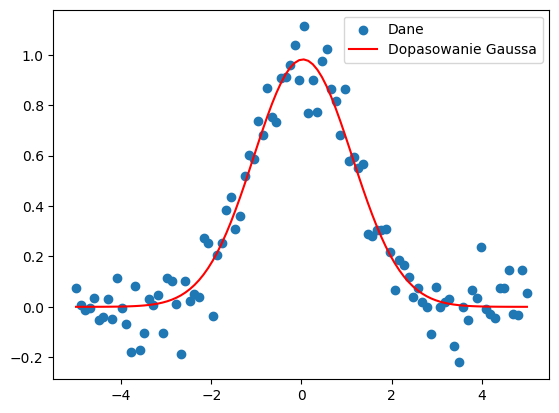

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Model Gaussa
def gaussian(x, amp, mean, stddev):
    return amp * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

# Dane syntetyczne
x_data = np.linspace(-5, 5, 100)
y_data = gaussian(x_data, 1, 0, 1) + 0.1 * np.random.normal(size=x_data.size)

# Dopasowanie krzywej
popt, _ = curve_fit(gaussian, x_data, y_data, p0=[1, 0, 1])

# Wykres danych i dopasowanej krzywej
plt.scatter(x_data, y_data, label='Dane')
plt.plot(x_data, gaussian(x_data, *popt), label='Dopasowanie Gaussa', color='red')
plt.legend()
plt.show()

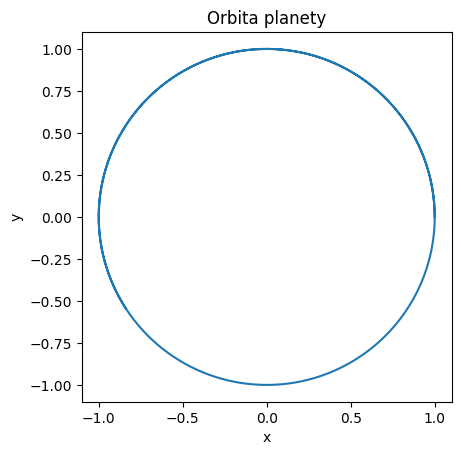

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Równanie Newtona dla ruchu planety wokół gwiazdy
def orbit(r, t, G, M):
    x, y, vx, vy = r
    r3 = np.sqrt(x**2 + y**2)**3
    ax = -G * M * x / r3
    ay = -G * M * y / r3
    return [vx, vy, ax, ay]

# Warunki początkowe: pozycja i prędkość (x, y, vx, vy)
initial_conditions = [1, 0, 0, 1]

# Stałe
G = 1.0  # Stała grawitacyjna
M = 1.0  # Masa gwiazdy
time = np.linspace(0, 10, 1000)

# Rozwiązywanie równań ruchu
solution = odeint(orbit, initial_conditions, time, args=(G, M))

# Wykres orbity
x, y = solution[:, 0], solution[:, 1]
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Orbita planety')
plt.gca().set_aspect('equal')
plt.show()


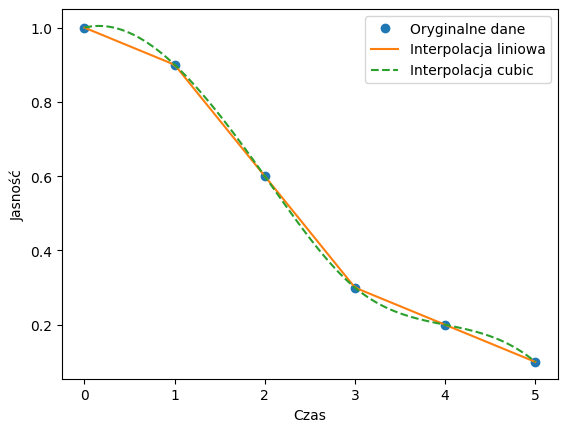

In [3]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Dane krzywej blasku (przykładowe)
time = np.array([0, 1, 2, 3, 4, 5])
brightness = np.array([1.0, 0.9, 0.6, 0.3, 0.2, 0.1])

# Interpolacja liniowa
f_linear = interp1d(time, brightness, kind='linear')

# Interpolacja typu 'cubic'
f_cubic = interp1d(time, brightness, kind='cubic')

# Nowe punkty czasowe
time_new = np.linspace(0, 5, 100)

# Wykres oryginalnych danych i interpolacji
plt.plot(time, brightness, 'o', label='Oryginalne dane')
plt.plot(time_new, f_linear(time_new), '-', label='Interpolacja liniowa')
plt.plot(time_new, f_cubic(time_new), '--', label='Interpolacja cubic')
plt.legend()
plt.xlabel('Czas')
plt.ylabel('Jasność')
plt.show()


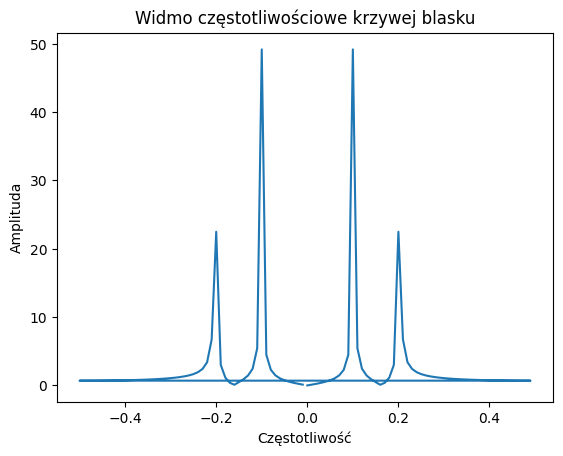

In [4]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt

# Syntetyczna krzywa blasku (np. sinusoidalna zmienność gwiazdy)
time = np.linspace(0, 10, 100)
brightness = np.sin(2 * np.pi * time) + 0.5 * np.sin(4 * np.pi * time)

# FFT
fft_result = fft(brightness)

# Wykres wyniku FFT (moduł)
freq = np.fft.fftfreq(time.shape[-1])
plt.plot(freq, np.abs(fft_result))
plt.title('Widmo częstotliwościowe krzywej blasku')
plt.xlabel('Częstotliwość')
plt.ylabel('Amplituda')
plt.show()


In [5]:
import numpy as np
from scipy import stats

# Dane syntetyczne (np. jasność gwiazd)
brightness_data = np.random.normal(loc=0.0, scale=1.0, size=1000) #generowanie danych srednia=0, odchylenie standarsowe 1.0

# Test Shapiro-Wilka na normalność rozkładu
stat, p_value = stats.shapiro(brightness_data)
print(f"Statystyka testu: {stat}, p-value: {p_value}")

if p_value > 0.05:
    print("Dane mają rozkład normalny")
else:
    print("Dane nie mają rozkładu normalnego")


Statystyka testu: 0.998727916647463, p-value: 0.7073017521090063
Dane mają rozkład normalny


In [8]:
from scipy import stats

# Dwie próbki danych
a = [2.3, 3.1, 2.9, 4.1]
b = [2.5, 3.5, 2.7, 3.9]

# Test t-Studenta dla dwóch niezależnych próbek
stat, p_value = stats.ttest_ind(a, b)
print(f"Statystyka testu t-Studenta: {stat}, p-value: {p_value}")

# Wydruk konkluzji
alpha = 0.05 # poziom istotnosci - 5% ryzyka ze odrzucimy prawidlowa hipoteze
if p_value > alpha:
    print("Brak statystycznie istotnych różnic między grupami (nie odrzucamy H₀).")
else:
    print("Istnieją statystycznie istotne różnice między grupami (odrzucamy H₀).")


Statystyka testu t-Studenta: -0.10016708449412633, p-value: 0.9234747989925064
Brak statystycznie istotnych różnic między grupami (nie odrzucamy H₀).


In [9]:
from scipy import stats

# Obserwowane i oczekiwane dane
observed = [10, 20, 30]
expected = [15, 15, 30]

# Test chi-kwadrat
stat, p_value = stats.chisquare(observed, expected)
print(f"Statystyka chi-kwadrat: {stat}, p-value: {p_value}")

# Wydruk hipotez
print("Hipoteza zerowa (H₀): Dane obserwowane są zgodne z danymi oczekiwanymi.")
print("Hipoteza alternatywna (H₁): Dane obserwowane różnią się od danych oczekiwanych.")

# Wydruk konkluzji
alpha = 0.05
if p_value > alpha:
    print("Brak statystycznie istotnych różnic między danymi obserwowanymi i oczekiwanymi (nie odrzucamy H₀).")
else:
    print("Istnieją statystycznie istotne różnice między danymi obserwowanymi i oczekiwanymi (odrzucamy H₀).")


Statystyka chi-kwadrat: 3.3333333333333335, p-value: 0.1888756028375618
Hipoteza zerowa (H₀): Dane obserwowane są zgodne z danymi oczekiwanymi.
Hipoteza alternatywna (H₁): Dane obserwowane różnią się od danych oczekiwanych.
Brak statystycznie istotnych różnic między danymi obserwowanymi i oczekiwanymi (nie odrzucamy H₀).


In [10]:
from scipy import stats
import numpy as np

# Porównanie próbki z rozkładem normalnym
data = np.random.normal(0, 1, 1000)

# Test Kolmogorova-Smirnova
stat, p_value = stats.kstest(data, 'norm')
print(f"Statystyka KS: {stat}, p-value: {p_value}")

# Wydruk hipotez
print("Hipoteza zerowa (H₀): Dane pochodzą z rozkładu normalnego.")
print("Hipoteza alternatywna (H₁): Dane nie pochodzą z rozkładu normalnego.")

# Wydruk konkluzji
alpha = 0.05
if p_value > alpha:
    print("Brak dowodów na odrzucenie hipotezy zerowej (nie odrzucamy H₀).")
else:
    print("Istnieją dowody na odrzucenie hipotezy zerowej (odrzucamy H₀).")


Statystyka KS: 0.01718213888056319, p-value: 0.9243156632950982
Hipoteza zerowa (H₀): Dane pochodzą z rozkładu normalnego.
Hipoteza alternatywna (H₁): Dane nie pochodzą z rozkładu normalnego.
Brak dowodów na odrzucenie hipotezy zerowej (nie odrzucamy H₀).
